<a href="https://colab.research.google.com/github/UdaraChamidu/MultiModal-RAG/blob/main/First_MultiModel_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MultiModal RAG with Gemini, Langchain and Google AI studio

**In this application, we can work both images and text data. We can give both inputs(an image and text query) together in the same time.**
--------------------------------------
* A text file was given as the data source.

* Also gemini-1.5-flash is used.

* Images was given to the model from the internet. ALso we can implement the code as it can give images to the model from our local storage.

* images were converted to base64 before give to the model

* First part, the model has been created only for text inputs. after that it was implemented that can input images also.
---------------------------------------
* RAG
For the first part created the RAG chain only for text data.
After that add the image data into the created RAG. (full rag chain)
--------------------------------------
* used model - gemini-1.5-flash
* embeddings-GoogleGenerativeAIEmbeddings
* embedding_model - models/embedding-001
* vectore store - FAISS

In [1]:
%pip install --upgrade  langchain langchain-google-genai "langchain[docarray]" faiss-cpu pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.9/433.9 kB 27.0 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.51
    Uninstalling langchain-core-0.3.51:
      Successfully uninstalled langchain-core-0.3.51
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.

In [2]:
pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.1 MB/s eta 0:00:00


In [3]:
import os
import requests
from PIL import Image

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown

In [5]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, SystemMessage
from langchain.vectorstores import DocArrayInMemorySearch
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain.schema.document import Document
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.vectorstores import FAISS

In [6]:
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [7]:
# # load the model
model=ChatGoogleGenerativeAI(model="gemini-1.5-flash")

# Test the model

**Way 01 - using invoke**

In [8]:
# load the gemini pro first for testing
model_text = model.invoke("Tell me a fun fact about AI.").content

# because of the .content, only the content part give as output. if not out put text will be large with many un nessasary parts

In [9]:
model_text

"AI can now generate surprisingly realistic and creative recipes, sometimes even inventing entirely new dishes with flavor combinations a human chef might never have thought of!  So, if you're looking for a culinary adventure, let an AI be your sous chef."

**Way 02 - using HumanMessage**

In [10]:
model(
    [
        HumanMessage(content="Answer with Simple 'Yes' or 'No'. Question: Is apple a Fruit?")
    ]
).content

# model name = model

<ipython-input-10-820b4616c6c8>:1: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  model(


'Yes'

# Test the model for an image

In [11]:
def get_image(url,filename,extension):
  content = requests.get(url).content
  with open(f'/content/{filename}.{extension}', 'wb') as f:
    f.write(content)
  image = Image.open(f"/content/{filename}.{extension}")
  image.show()
  return image

In [12]:
image = get_image("https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/1705ca64-fbc8-4b79-a451-4ab77760c219/dunk-low-older-shoes-C7T1cx.png",
                  "nike-shoes",
                  "png")

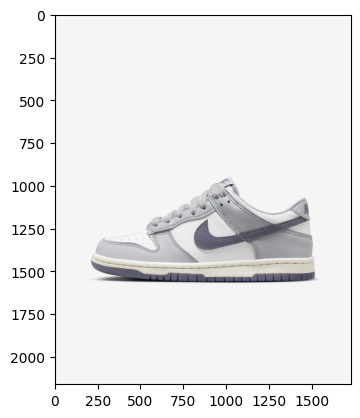

In [13]:
plt.imshow(image)
plt.show()

**Convert Image to base64**

In [14]:
from PIL import Image
from io import BytesIO
import base64

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage

If image is saved in the main directory

In [16]:
# Load and convert the image to base64
image_path = "image01.jpeg"
image = Image.open(image_path)

buffered = BytesIO()
image.save(buffered, format="JPEG")
img_str = base64.b64encode(buffered.getvalue()).decode()

In [17]:
prompt="give me summary of this image in 5 words"

In [18]:
# for local machine imported image

message= HumanMessage(
    content=[
         {
            "type": "text",
            "text": prompt,
        },

        {
            "type": "image_url", "image_url":  {
                "url": f"data:image/jpeg;base64,{img_str}"}

        }
    ]
)

In [19]:
model.invoke([message]).content

'Two deer in snowy forest.'

If image is imported from the google

In [20]:
image_url = "https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/1705ca64-fbc8-4b79-a451-4ab77760c219/dunk-low-older-shoes-C7T1cx.png"

In [21]:
prompt="give me summary of this image in 5 words"

In [22]:
# for google imported image

message= HumanMessage(
    content=[
         {
            "type": "text",
            "text": prompt,
        },

        {
            "type": "image_url", "image_url": image_url
        }
    ]
)

In [23]:
model.invoke([message]).content

'Grey Nike Dunk low shoe.'

# Build The RAG

for data, a txt file was given

In [84]:
loader = TextLoader("/content/deer.txt")
print(loader.load()[0].page_content)

Deer: A Natural Marvel of the Wild

Deer are among the most graceful and iconic creatures in the animal kingdom, admired for their beauty, agility, and adaptability. These mammals, belonging to the family Cervidae, inhabit a vast range of environments across the world and hold significant ecological, cultural, and symbolic value. From the snowy tundras of the Arctic to the dense forests of North America and the plains of Eurasia, deer have evolved into numerous species, each adapted to thrive in its specific habitat.

Physically, deer are known for their slender bodies, long legs, and antlers — a distinctive feature seen in almost all males of the species and even in females in the case of reindeer. Antlers are made of bone and are grown and shed annually, a process controlled by seasonal changes in daylight and hormonal cycles. These structures play a crucial role in mating rituals, as males use them in combat to establish dominance and secure breeding rights. The size and complexity 

In [85]:
text=loader.load()[0].page_content

In [86]:
text

"Deer: A Natural Marvel of the Wild\n\nDeer are among the most graceful and iconic creatures in the animal kingdom, admired for their beauty, agility, and adaptability. These mammals, belonging to the family Cervidae, inhabit a vast range of environments across the world and hold significant ecological, cultural, and symbolic value. From the snowy tundras of the Arctic to the dense forests of North America and the plains of Eurasia, deer have evolved into numerous species, each adapted to thrive in its specific habitat.\n\nPhysically, deer are known for their slender bodies, long legs, and antlers — a distinctive feature seen in almost all males of the species and even in females in the case of reindeer. Antlers are made of bone and are grown and shed annually, a process controlled by seasonal changes in daylight and hormonal cycles. These structures play a crucial role in mating rituals, as males use them in combat to establish dominance and secure breeding rights. The size and comple

In [87]:
# chunking
def get_text_chunks_langchain(text):
  text_splitter = CharacterTextSplitter(chunk_size=20, chunk_overlap=10)
  docs = [Document(page_content=x) for x in text_splitter.split_text(text)]
  return docs

In [88]:
docs = get_text_chunks_langchain(text)

In [89]:
# embedding
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [90]:
# vector
vectorstore = FAISS.from_documents(docs,embedding=embeddings)

In [91]:
# retriever
retriever=vectorstore.as_retriever()

In [92]:
# ask anything related to the provided document
retriever.invoke("Evaluation Metrics")

# 3 different documents recieved.

[Document(id='28708c51-e830-4b28-b36a-bc79a7869659', metadata={}, page_content='Deer: A Natural Marvel of the Wild'),
 Document(id='cdfa3cab-1337-496a-b5dd-09726f717840', metadata={}, page_content='Despite these challenges, deer have demonstrated remarkable resilience. Their adaptability has allowed them to thrive in both wild and human-altered landscapes. Conservation efforts and scientific research continue to shed light on their behavior, genetics, and ecological importance, guiding policies to ensure their survival and harmonious coexistence with other species.'),
 Document(id='17271934-cd98-42cc-9777-cca5b130ea03', metadata={}, page_content='In conclusion, deer are more than just elegant creatures of the forest — they are vital components of ecosystems, storied figures in human culture, and symbols of natural beauty and resilience. As we look to the future, understanding and protecting deer and their habitats will be essential not only for their continued existence but for the hea

create chain

In [93]:
from langchain_core.runnables import RunnableLambda, RunnablePassthrough

In [94]:
# for images
llm_images = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

In [95]:
# for text data
llm_text = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

In [96]:
template = """
```
{context}
```

{query}


Provide brief information and store location.
"""

In [97]:
prompt = ChatPromptTemplate.from_template(template)

#  Create RAG chain for multi model

In [98]:
# with lext data (llm_text)
rag_chain = (
    {"context": retriever, "query": RunnablePassthrough()}
    | prompt
    | llm_text
    | StrOutputParser()
)

In [124]:
result = rag_chain.invoke("can you tell me the body shape of a deer?")

In [139]:
result1 = rag_chain.invoke("deer have trunk ?")

In [140]:
display(Markdown(result))
# the output provide considering the provided text

Deer are slender, quadrupedal mammals with long legs and a long neck.  Males typically have antlers, which are annually shed and regrown.  Their body shape is characterized by a long, tapering body from shoulders to rear, and a relatively small head.

**Information stored:** Within the provided text snippets.

In [141]:
display(Markdown(result1))

No, deer do not have trunks.  Deer are mammals belonging to the family Cervidae, and their defining characteristics include slender bodies, long legs, and antlers (in most males).  This information is present across all four provided documents.

ADD images also into the chain

In [105]:
rag_chain

{
  context: VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x7f3304192050>, search_kwargs={}),
  query: RunnablePassthrough()
}
| ChatPromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, template='\n```\n{context}\n```\n\n{query}\n\n\nProvide brief information and store location.\n'), additional_kwargs={})])
| ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7f32fd7a6d90>, default_metadata=())
| StrOutputParser()

In [106]:
# create the full chain with the images also
full_chain = (
    RunnablePassthrough() | llm_images | StrOutputParser() | rag_chain
)

In [107]:
full_chain

RunnablePassthrough()
| ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7f330419cc50>, default_metadata=())
| StrOutputParser()
| {
    context: VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x7f3304192050>, search_kwargs={}),
    query: RunnablePassthrough()
  }
| ChatPromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, template='\n```\n{context}\n```\n\n{query}\n\n\nProvide brief information and store location.\n'), additional_kwargs={})])
| ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativel

In [108]:
url_1 = "https://worlddeer.org/wp-content/uploads/2020/10/red-deer-1024x538.jpg"

In [109]:
# get an image from a url
# link, savin name, type

image = get_image(url_1, "deer_google", "jpg")

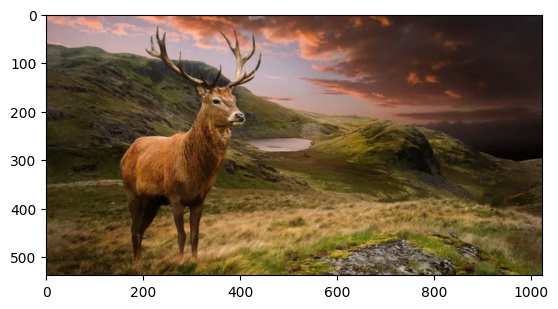

In [110]:
plt.imshow(image)
plt.show()

Question 01

In [133]:
# passing an query with downloaded image

message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "Tell me the shape of a deer.",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": {"url":url_1}}
    ]
)

# if we did not give a text here, the model give answers for different different things

In [134]:
result = full_chain.invoke([message])

In [135]:
display(Markdown(result))

# without image part it provided information for the same query - "Deer have slender bodies and long legs. This information is found in document with id 20161756-9d69-485f-b781-c4adb224b559."
# with the provided image, it gave this - "Deer are slender quadrupedal mammals with long legs, a long neck, and an elongated head. Males often possess antlers. This information is distributed across all four provided documents."

Deer are slender, quadrupedal mammals with long legs and a long neck.  Males typically have antlers, which are annually shed and regrown.  Their body shape is characterized by a long, tapering body from shoulders to rear, and a relatively small head.

**Information stored:** Within the provided text snippets.

Question 2

In [142]:
# passing an query with downloaded image

message2 = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "deers have trunk?",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": {"url":url_1}}
    ]
)

# if we did not give a text here, the model give answers for different different things

In [143]:
result2 = full_chain.invoke([message2])
display(Markdown(result2))

Deer are graceful, herbivorous mammals (family Cervidae) found worldwide.  They are known for their slender bodies, long legs, and (in males of many species) antlers.  Deer do *not* have trunks.  Information is stored in the provided document set.